<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Taller_4/Taller_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219

Primer Semestre - 2024

* **Integrante 1:** Jhon Stewar Rayo Mosquera
* **Integrante 2:** Carlos Raúl de la Rosa Peredo

### Modelo de agrupación

El conjunto de datos "Tech Students' Profile Prediction" contiene información sobre las habilidades, preferencias profesionales y antecedentes académicos de estudiantes en el campo de la tecnología. En este proyecto, se busca aplicar técnicas de agrupación para identificar grupos de estudiantes con perfiles similares, lo que podría ser útil para la orientación profesional y la personalización de programas educativos.

El objetivo de este proyecto es desarrollar un modelo de agrupación que clasifique a los estudiantes en función de sus habilidades, intereses y antecedentes, utilizando los datos proporcionados en el conjunto de datos "Tech Students' Profile Prediction". Este modelo deberá ser capaz de identificar patrones y tendencias en los perfiles de los estudiantes, lo que podría ayudar a las instituciones educativas y a los empleadores a adaptar sus estrategias de enseñanza y contratación.

Para poder realizar este proyecto, se le piden los siguientes análisis:

* Realizar la agrupación con el Algoritmo k-Means. Obtener los centroides e interpretarlos.


**Fuente de datos:** [Tech Students' Profile Prediction](https://www.kaggle.com/datasets/scarecrow2020/tech-students-profile-prediction)

### 0. Importar librerías



In [36]:
# Importamos las librerías requeridas para el desarrollo del modelo

# Manejo de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


# Metricas de evaluación
from sklearn.metrics import (
    silhouette_score,
    silhouette_samples,
)

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import IncrementalPCA

## 1. Procesamiento y entendimiento de los datos

In [3]:
# Descargamos el data set

! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! mkdir -p content
%cd content
! kaggle datasets download scarecrow2020/tech-students-profile-prediction --force
! unzip -o tech-students-profile-prediction.zip
%cd ../

cp: no se puede efectuar `stat' sobre 'kaggle.json': No existe el archivo o el directorio
/home/raul/Escritorio/extra/misis/ml_tech/Machine-Learning-Assignments/Taller4/content


/home/raul/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


100%|█████████████████████████████████████████| 666k/666k [00:00<00:00, 885kB/s]
100%|█████████████████████████████████████████| 666k/666k [00:00<00:00, 884kB/s]
Archive:  tech-students-profile-prediction.zip
  inflating: dataset-tortuga.csv     
  inflating: to_be_scored_tortuga.csv  
/home/raul/Escritorio/extra/misis/ml_tech/Machine-Learning-Assignments/Taller4


In [2]:
df = pd.read_csv('content/dataset-tortuga.csv')
df.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


In [3]:
# Existen 13 columnas en el dataset con valores númericos que pueden ser utilizados
# para perfilar a los estudiantes. Dichas columnas cuentan con valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        20000 non-null  int64  
 1   NAME                              20000 non-null  object 
 2   USER_ID                           20000 non-null  int64  
 3   HOURS_DATASCIENCE                 19986 non-null  float64
 4   HOURS_BACKEND                     19947 non-null  float64
 5   HOURS_FRONTEND                    19984 non-null  float64
 6   NUM_COURSES_BEGINNER_DATASCIENCE  19974 non-null  float64
 7   NUM_COURSES_BEGINNER_BACKEND      19982 non-null  float64
 8   NUM_COURSES_BEGINNER_FRONTEND     19961 non-null  float64
 9   NUM_COURSES_ADVANCED_DATASCIENCE  19998 non-null  float64
 10  NUM_COURSES_ADVANCED_BACKEND      19992 non-null  float64
 11  NUM_COURSES_ADVANCED_FRONTEND     19963 non-null  float64
 12  AVG_

In [4]:
# Se asumirá que los valores nulos en las columnas se debe a que
# el estudiante no ha completado la información porque no cuenta 
# 'experencia' en esos rubros. 
# Se procederá a rellenar los valores nulos con 0.

df = df.fillna(0)

In [5]:
# A priori se sabe que existen 5 perfiles de estudiantes en el dataset.
# Sin embargo, se realizará un análisis a traves de tecnicas cómo 'elbow method' 
# y 'silhouette score' para determinar el número óptimo de clusters.
df.PROFILE.unique()

array(['beginner_front_end', 'advanced_front_end',
       'beginner_data_science', 'beginner_backend',
       'advanced_data_science', 'advanced_backend'], dtype=object)

In [38]:
## La distribución de las variables en el dataset no parece tener valores atipicos, 
## su rango resulta consistente con la realidad.

df.describe()

,Unnamed: 0,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,10499.334050,5.013036e+07,37.539000,43.436850,36.907050,3.69380,3.711800,4.040400,3.396800,4.342600,3.361600,64.35455,66.952150,66.566850
std,5773.939433,2.880690e+07,22.409002,22.469672,20.608621,2.00478,2.103868,2.300703,2.111604,2.162882,1.991267,15.44483,14.836211,15.636382
min,28.000000,1.172000e+03,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,5499.750000,2.534718e+07,21.000000,28.000000,22.000000,2.00000,2.000000,2.000000,2.000000,3.000000,2.000000,55.00000,58.000000,57.000000
50%,10499.500000,5.012472e+07,37.000000,43.000000,37.000000,4.00000,4.000000,4.000000,3.000000,4.000000,3.000000,65.00000,68.000000,67.000000
75%,15499.250000,7.513944e+07,53.000000,59.000000,51.000000,5.00000,5.000000,6.000000,5.000000,6.000000,5.000000,74.00000,77.000000,77.000000
max,20499.000000,9.999234e+07,127.000000,147.000000,124.000000,12.00000,12.000000,13.000000,13.000000,14.000000,12.000000,100.00000,100.000000,100.000000


In [39]:
# Con el fin de optimizar el rendimiento del modelo, se procederá a
# normalizar los datos utilizando la clase StandardScaler de sklearn.

scaler = StandardScaler()

X = df.loc[:, 'HOURS_DATASCIENCE':'AVG_SCORE_FRONTEND'].values

X_std = scaler.fit_transform(X)

## 2. Modelado de la información usando k-means

### 2.1 Estimación del número óptimo de clusters

In [40]:
distortions = []
inertias = []
K = range(1, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=43).fit(X_std)
 
    distortions.append(sum(np.min(cdist(X_std, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)


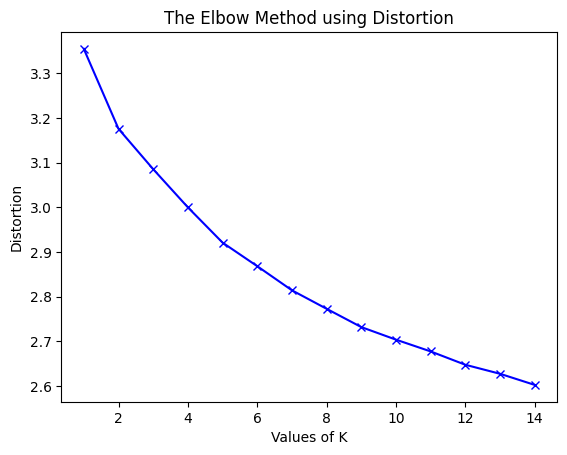

In [41]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

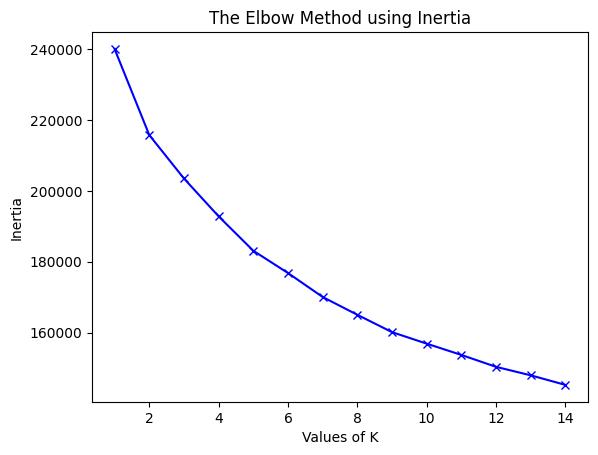

In [42]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

##### Las gráficas muestran que el número de cluster podría estar entre 5 y 7, lo cual es consistente con la cantidad esperada inicialmente. A continuación se complementará el análisis con el silhouette score

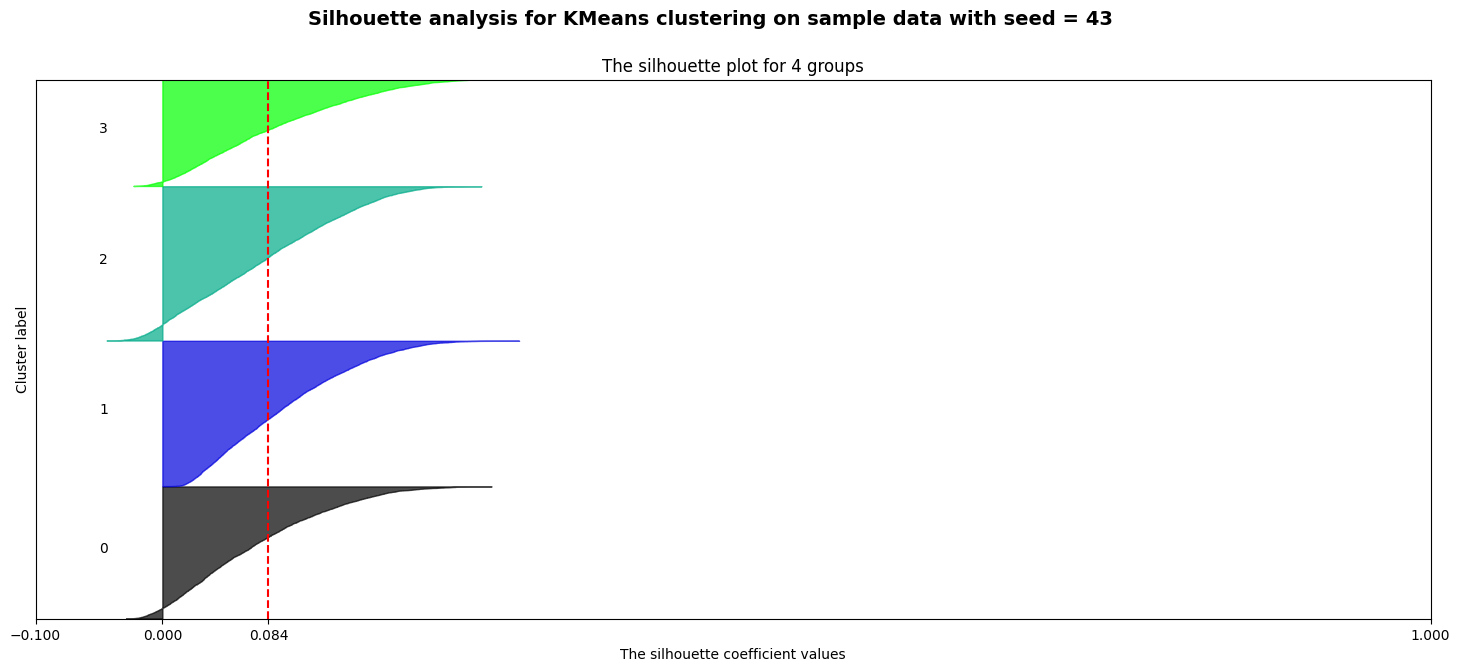

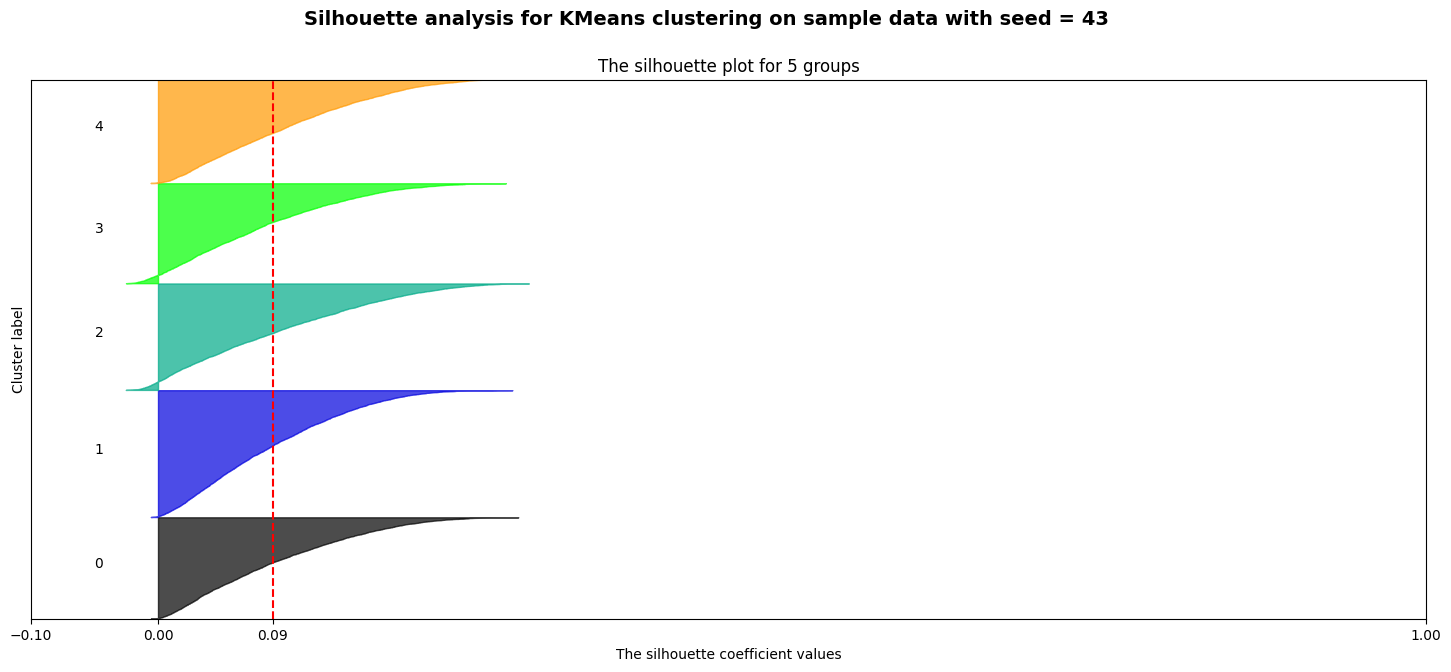

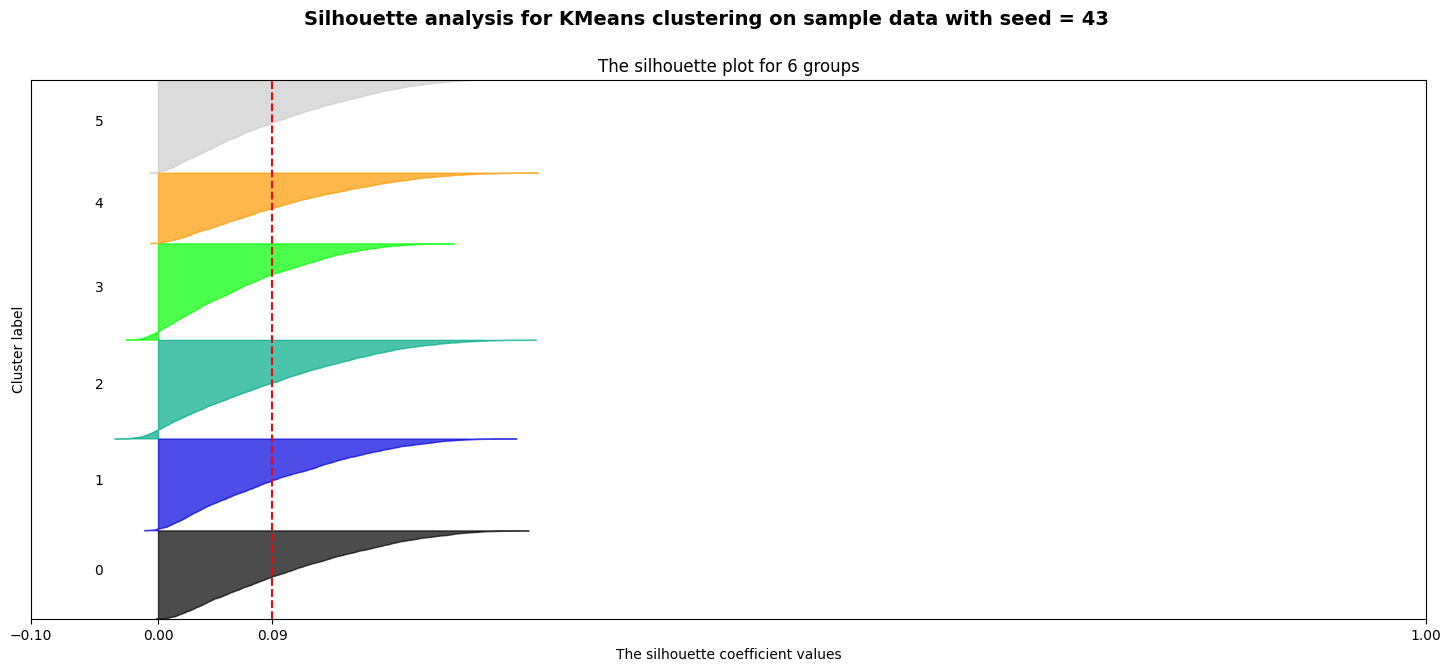

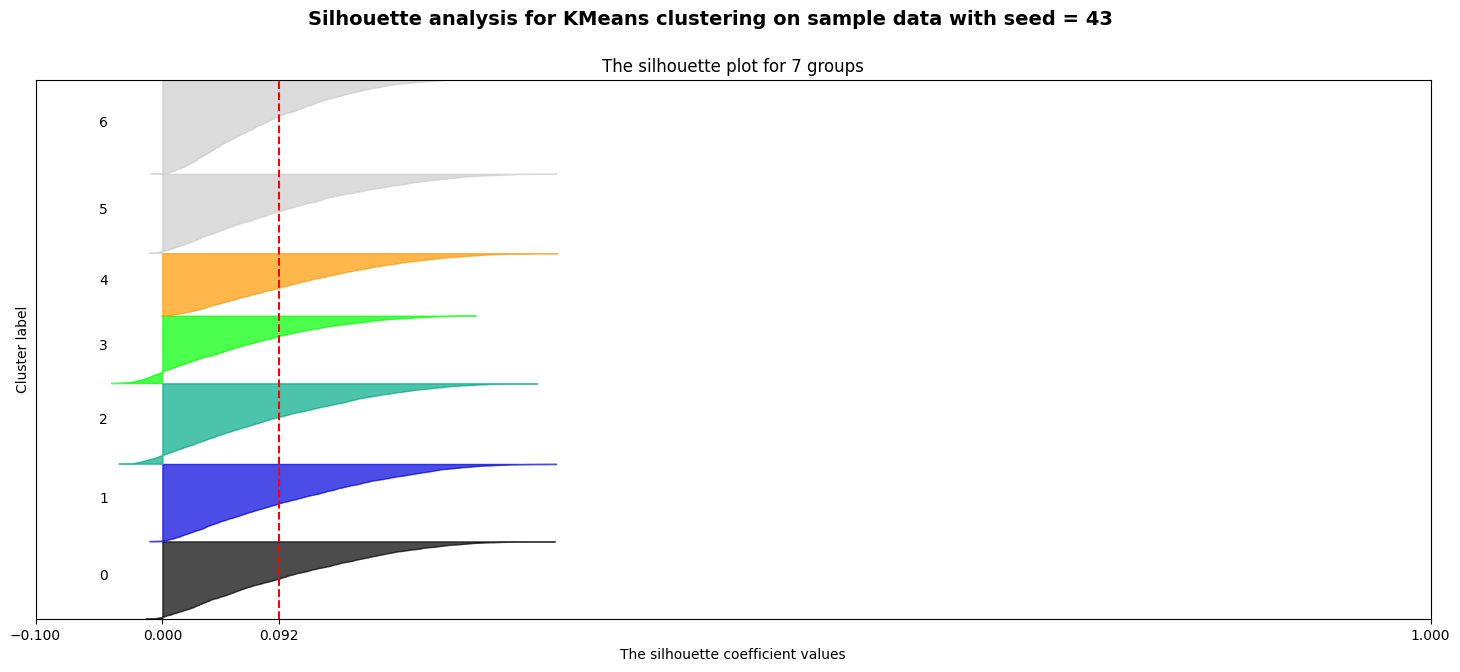

In [43]:
for n, k in enumerate([4,5,6,7]):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 0.2])
    ax1.set_ylim([0, len(X_std) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=43)
    cluster_labels = clusterer.fit_predict(X_std)


    silhouette_avg = silhouette_score(X_std, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_std, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {k} groups")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, silhouette_avg, 1.0])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with seed = %d"
        % 43,
        fontsize=14,
        fontweight="bold",
    )

plt.show()
     

##### Dado que el silhouette score parece estabilizarse en k=5, teniendo incrementos muy leves en las siguientes iteraciones. Se opta por elegir este valor cómo el número óptimo de grupos. Además, incrementar la cantidad de clusters podría implicar un aumento en la complejidad para interpretar cada grupo.

### 2.2 Implementación modelo k-means con k=5

In [44]:
kmeans = KMeans(n_clusters=5, random_state=43).fit(X_std)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

##### Visualización de clusters

In [88]:
X_pca = IncrementalPCA(n_components=2).fit_transform(X_std)
pca_df = pd.DataFrame(data=X_pca, columns=['pca1', 'pca2'])
pca_df['cluster'] = labels

In [136]:
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd',]

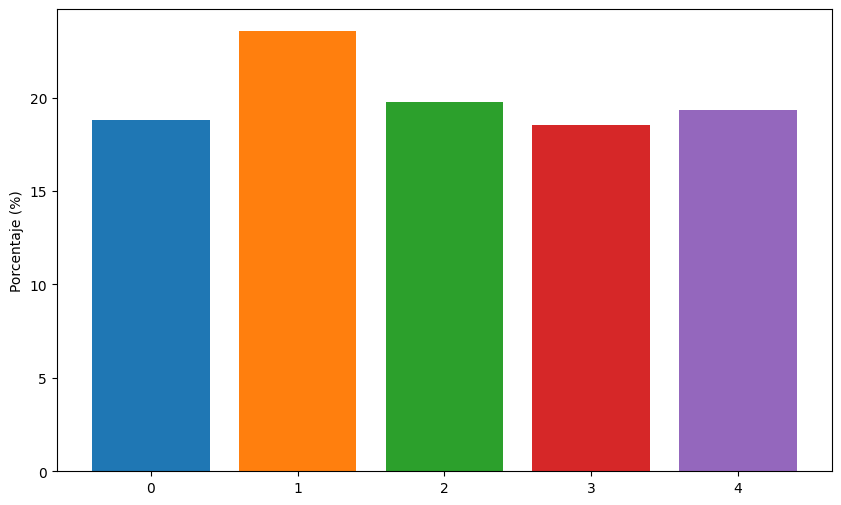

In [137]:
cluster_cnt = (pca_df.value_counts('cluster',normalize=True)*100).reset_index().sort_values('cluster')

plt.figure(figsize=(10, 6))
plt.bar(cluster_cnt['cluster'], cluster_cnt['proportion'], color=colors)
plt.ylabel('Porcentaje (%)')
plt.show()

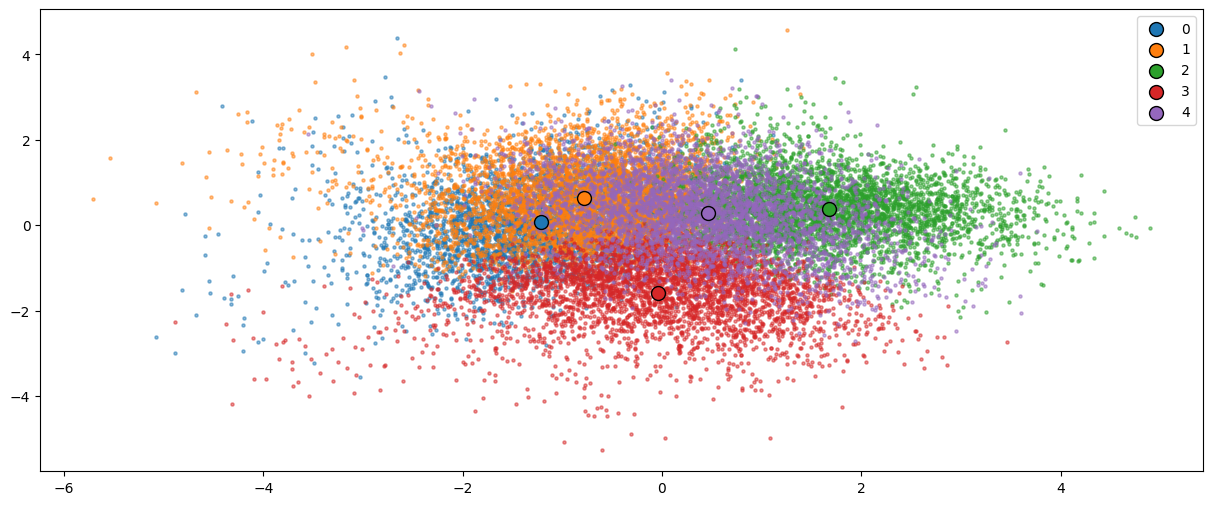

In [139]:
plt.figure(figsize=(15, 6))

for g in [0, 1, 2, 3, 4]:
    pca_cluster = pca_df[pca_df['cluster'] == g].copy()
    plt.scatter(
        pca_cluster['pca1'],
        pca_cluster['pca2'],
        s=5,
        alpha=0.5,
        color=colors[g],
    )
    plt.scatter(
        pca_cluster['pca1'].mean(),
        pca_cluster['pca2'].mean(),
        s=100,
        label=g,
        zorder=100,
        color=colors[g],
        ec='k',
    )
plt.legend()
plt.show()


### 3. Interpretación de centroides

In [ ]:
clusters_df = pd.DataFrame(data=centroids, columns=df.columns[3:-1])
clusters_df.reset_index(names='cluster', inplace=True)

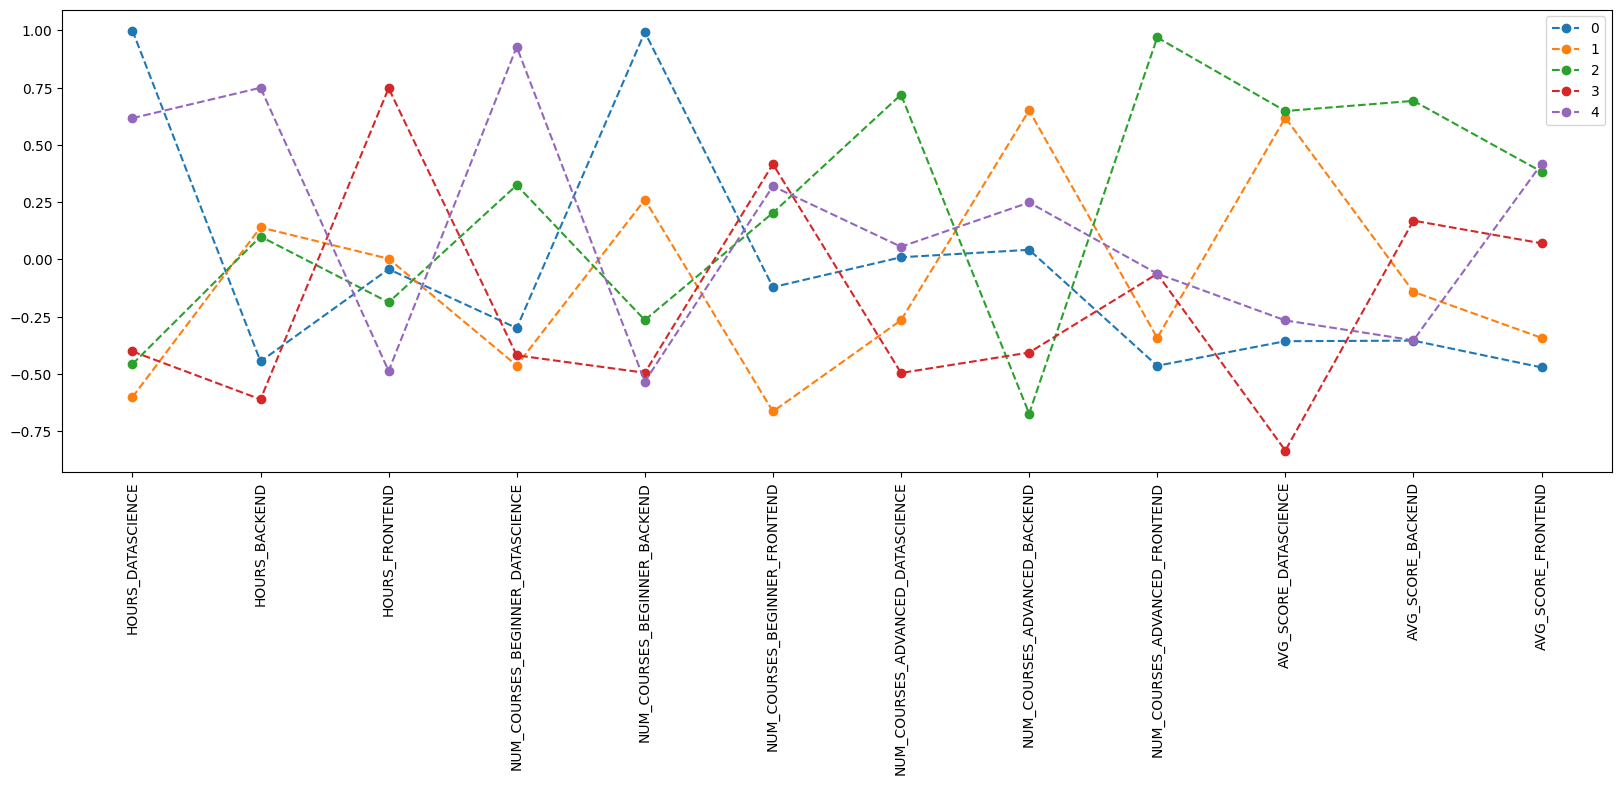

In [74]:
plt.figure(figsize=(20, 6))
for row in clusters_df.iterrows():
    plt.plot(row[1][1:], label=row[0], linestyle='--', marker='o')
plt.xticks(rotation=90)
plt.legend()
plt.show()

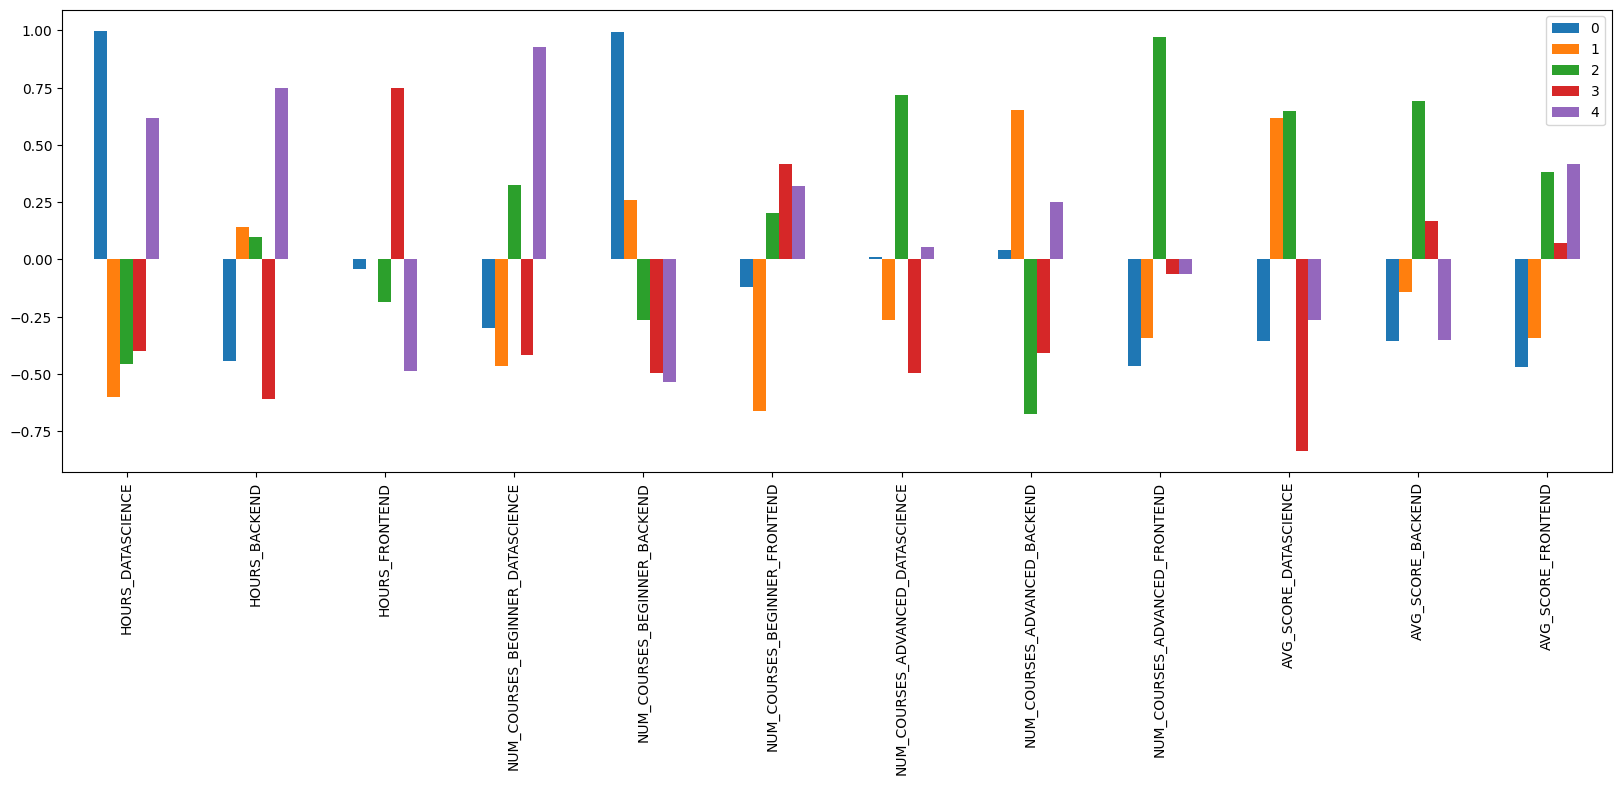

In [82]:
clusters_df.iloc[:,1:].T.plot.bar(figsize=(20, 6))
plt.show()